In [1]:
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 

In [3]:
%%time
train = pd.read_parquet('data_fusion_train.parquet')

Wall time: 16.6 s


In [4]:
train.shape

(26094077, 9)

In [5]:
train = train[train.category_id != -1].drop_duplicates('item_name')

In [6]:
train.shape

(48225, 9)

In [5]:
train.dtypes

receipt_id             int64
receipt_dayofweek      int32
receipt_time          object
item_name             object
item_quantity        float64
item_price             int64
item_nds_rate          int32
category_id            int64
brands                object
dtype: object

In [6]:
train.head(10)

,receipt_id,receipt_dayofweek,receipt_time,item_name,item_quantity,item_price,item_nds_rate,category_id,brands
0,7,5,09:50,Флуконазол капс 150мг №1 Вертекс,1.0,7,-1,-1,вертекс
1,11,6,20:34,"Молоко 3,2%,шт",2.0,8,2,78,None
2,39,4,11:28,"Борщ Станичный с тушенкой, 103 ккал (завод, з/у)",1.0,6,1,-1,None
3,39,4,11:28,"Компот из изюма, 114 ккал",1.0,4,1,71,None
4,39,4,11:28,"Макаронные изделия отварные (масло сливочное),...",1.0,4,1,71,None
6,39,4,11:28,"Филе Горизонт (филе птицы), 218 ккал",1.0,7,1,-1,горизонт
10,49,3,14:27,3 Бумага Упак 1/Прочи/В асс,1.0,8,1,-1,None
11,49,3,14:27,4 Бумага Упак 1/Прочи/В асс,1.0,8,1,-1,None
12,49,3,14:27,Брюки спорт мал SAMO M-1016,1.0,13,6,-1,None
13,49,3,14:27,Бюстгальтер БН137,1.0,13,-1,-1,None


In [12]:
train.category_id.nunique()

96

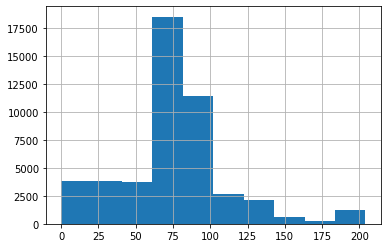

In [13]:
train.category_id.hist()

In [16]:
train.brands.nunique()

2504

In [18]:
train.brands.unique()

array([None, 'zewa', 'кока-кола', ..., 'леди джем', 'puff', 'тот'],
      dtype=object)

In [40]:
len(train[ train.brands != None])

48225

In [19]:
train.item_nds_rate.nunique()

7

In [20]:
train.item_nds_rate.unique()

array([ 2,  1, -1,  6,  5,  4,  3])

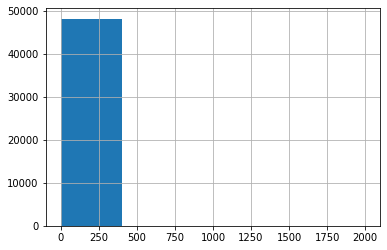

In [23]:
train.item_quantity.hist(bins=5)

In [25]:
train.item_quantity.nunique()

2071

In [31]:
train.item_quantity.describe()

count    48225.000000
mean         1.957514
std         17.629286
min          0.005000
25%          1.000000
50%          1.000000
75%          1.000000
max       2000.000000
Name: item_quantity, dtype: float64

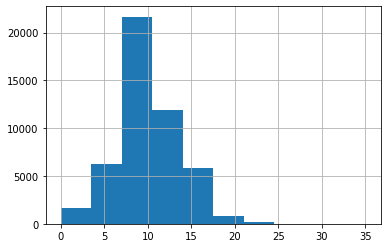

In [27]:
train.item_price.hist()

In [30]:
train.item_price.describe()

count    48225.000000
mean         9.681472
std          3.576853
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         35.000000
Name: item_price, dtype: float64

In [33]:
train.receipt_dayofweek.describe()

count    48225.000000
mean         3.058580
std          1.979068
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: receipt_dayofweek, dtype: float64

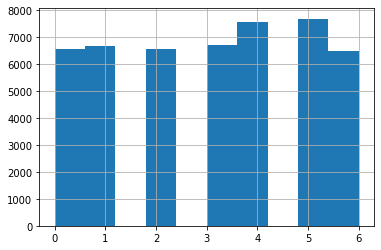

In [34]:
train.receipt_dayofweek.hist()

In [4]:
stop = stopwords.words('russian')
tfidf = TfidfVectorizer(stop_words=stop, max_features=1000)
X_train = tfidf.fit_transform(train.item_name)

In [5]:
clf = LogisticRegression(max_iter=400)
cross_val_score(clf, X_train, train.category_id, cv=3, scoring='f1_weighted')

array([0.64342123, 0.62681385, 0.5955667 ])

In [6]:
clf.fit(X_train, train.category_id)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
import pickle
pickle.dump(tfidf, open('tfidf', 'wb'))
pickle.dump(clf, open('clf_task1', 'wb'))

## NLP

In [4]:
train.head(5)

,receipt_id,receipt_dayofweek,receipt_time,item_name,item_quantity,item_price,item_nds_rate,category_id,brands
0,7,5,09:50,Флуконазол капс 150мг №1 Вертекс,1.0,7,-1,-1,вертекс
1,11,6,20:34,"Молоко 3,2%,шт",2.0,8,2,78,None
2,39,4,11:28,"Борщ Станичный с тушенкой, 103 ккал (завод, з/у)",1.0,6,1,-1,None
3,39,4,11:28,"Компот из изюма, 114 ккал",1.0,4,1,71,None
4,39,4,11:28,"Макаронные изделия отварные (масло сливочное),...",1.0,4,1,71,None


In [19]:
train.dtypes

receipt_id             int64
receipt_dayofweek      int32
receipt_time          object
item_name             object
item_quantity        float64
item_price             int64
item_nds_rate          int32
category_id            int64
brands                object
dtype: object

In [5]:
train.brands = train.brands.astype(str)

In [6]:
train2 = train[ train['brands'] != 'None' ]

In [7]:
train2.shape

(6801308, 9)

In [20]:
train2.head(50)

,receipt_id,receipt_dayofweek,receipt_time,item_name,item_quantity,item_price,item_nds_rate,category_id,brands
0,7,5,09:50,Флуконазол капс 150мг №1 Вертекс,1.000,7,-1,-1,вертекс
6,39,4,11:28,"Филе Горизонт (филе птицы), 218 ккал",1.000,7,1,-1,горизонт
16,56,5,11:42,ЙогуртпитEPICAклуб/мар290,1.000,10,2,-1,epic
19,59,1,01:03,"Напиток Дюшес 0,65л ПЭТ ОАО""АЯН"" Респуб. Хак...",1.000,6,1,-1,аян
41,110,4,18:32,Чипсы Лейс сметана\лук 40гр,1.000,6,1,-1,лейс
54,122,0,11:46,Сыр БЕЖИН ЛУГ плав ванн 50% 40,1.000,11,2,-1,бежин луг
76,139,4,20:23,Френч-пресс стекло/пластик 350мл Mallony,2.000,8,1,-1,mallony
78,187,2,10:52,БЗМЖ Пломбир на Печенье Каприз Шоколад 95 гр,1.000,8,6,-1,каприз
97,227,3,20:17,"Пиво Велкопоповицкий Козел темное ж/б 3,7% 0,45л",1.000,9,6,-1,велкопоповицкий козел
99,227,3,20:17,Семечки от Мартина 100г соленые,1.000,8,6,-1,от мартина


In [65]:
len(set(train2.brands))

17424

In [9]:
from nltk import word_tokenize
from tqdm.auto import tqdm, trange

In [13]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['кг', 'г', 'гр', 'мг', 'ккал', 'л', 'мл', 'уп', 'шт', 'гр', 'капс'])

In [11]:
import string

print(string.punctuation)
string.punctuation += '№'
def remove_punctuation(text):
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text):
    return ''.join([i if not i.isdigit() else ' ' for i in text])

import re
def remove_multiple_spaces(text):
	return re.sub(r'\s+', ' ', text, flags=re.I)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
## 
all_texts = ''
for item_name in tqdm(train2.item_name):
    all_texts += ' ' + item_name

In [15]:
len(all_texts)

250431592

In [16]:
import codecs
file = codecs.open("all_texts.txt", "w", "utf-8")
file.write(all_texts)
file.close()

In [17]:
all_texts2 = codecs.open("all_texts.txt", "r", "utf-8").read()

In [18]:
len(all_texts2)

250431592

In [21]:
all_texts2[:100]

' Флуконазол капс 150мг №1 Вертекс Филе Горизонт (филе птицы), 218 ккал ЙогуртпитEPICAклуб/мар290 Нап'

In [ ]:
all_texts2 = remove_punctuation(remove_numbers(remove_multiple_spaces(all_texts2)))

In [23]:
all_texts_chunk = all_texts2[:100000]

In [24]:
all_texts_chunk = remove_punctuation(remove_numbers(remove_multiple_spaces(all_texts_chunk)))

In [53]:
all_texts_chunk = all_texts_chunk.lower()

In [54]:
all_texts_chunk[:100]

' флуконазол капс    мг    вертекс филе горизонт  филе птицы       ккал йогуртпитepicaклуб мар    нап'

In [55]:
all_tokens = all_texts_chunk.split()

In [56]:
print(len(all_tokens))
print(len(set(all_tokens)))
all_tokens[:10]

15848
4867


['флуконазол',
 'капс',
 'мг',
 'вертекс',
 'филе',
 'горизонт',
 'филе',
 'птицы',
 'ккал',
 'йогуртпитepicaклуб']

In [57]:
all_tokens_clean = []
for token in tqdm(all_tokens):
    if token not in russian_stopwords and len(token) > 2:
        all_tokens_clean.append(token)

In [58]:
len(all_tokens_clean)

11334

In [59]:
import nltk
text = nltk.Text(all_tokens_clean)
text[:10]

['флуконазол',
 'вертекс',
 'филе',
 'горизонт',
 'филе',
 'птицы',
 'йогуртпитepicaклуб',
 'мар',
 'напиток',
 'дюшес']

In [60]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)

Wall time: 6.98 ms


In [61]:
fdist.most_common(120)

[('бзмж', 90),
 ('кола', 88),
 ('напиток', 82),
 ('пэт', 73),
 ('вода', 71),
 ('сыр', 69),
 ('кока', 69),
 ('сигареты', 64),
 ('газ', 61),
 ('шок', 51),
 ('чипсы', 48),
 ('хлеб', 48),
 ('чай', 45),
 ('россия', 41),
 ('пак', 40),
 ('орбит', 40),
 ('йогурт', 38),
 ('шоколад', 37),
 ('яблоко', 37),
 ('жев', 34),
 ('корм', 34),
 ('пиво', 33),
 ('масло', 33),
 ('чудо', 32),
 ('белый', 31),
 ('сок', 31),
 ('пепси', 30),
 ('кофе', 30),
 ('молоко', 29),
 ('печенье', 28),
 ('кошек', 28),
 ('персик', 27),
 ('мол', 27),
 ('резинка', 26),
 ('конфеты', 26),
 ('сметана', 25),
 ('нап', 25),
 ('мята', 25),
 ('gold', 25),
 ('черный', 24),
 ('бел', 24),
 ('майонез', 23),
 ('йог', 23),
 ('продукт', 22),
 ('соус', 22),
 ('вес', 22),
 ('водка', 22),
 ('мыло', 21),
 ('гель', 21),
 ('колбаса', 20),
 ('мрц', 20),
 ('лейс', 19),
 ('стд', 19),
 ('крем', 19),
 ('ritter', 19),
 ('батончик', 19),
 ('семечки', 18),
 ('мороженое', 18),
 ('клубника', 18),
 ('таб', 18),
 ('one', 18),
 ('стм', 17),
 ('premium', 17),
 (

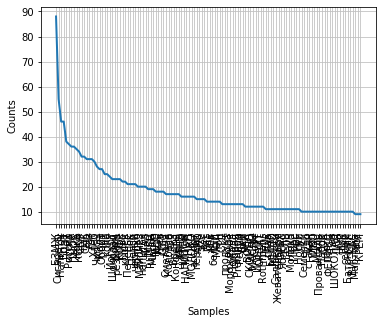

In [47]:
fdist.plot(120,cumulative=False)

In [48]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [62]:
finder = BigramCollocationFinder.from_words(all_tokens_clean)

In [50]:
finder.nbest(bigram_measures.pmi, 10) 

[('ACR', 'Пена'),
 ('ADEPAW', 'Легинсы'),
 ('AHMAD', 'TEA'),
 ('ALGAE', 'Ген'),
 ('AMP', 'провод'),
 ('ARIEL', 'АВТ'),
 ('ARMORTECH', 'СИНТЕТИК'),
 ('ASD', 'БлокД'),
 ('ATTACHE', 'PROFF'),
 ('AVS', 'SPECTRAS')]

In [64]:
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:30] 

[(('кока', 'кола'), 69),
 (('кола', 'стд'), 19),
 (('кола', 'пэт'), 18),
 (('чипсы', 'лейс'), 18),
 (('шок', 'ritter'), 17),
 (('корм', 'кошек'), 16),
 (('пепси', 'кола'), 16),
 (('one', 'size'), 15),
 (('gold', 'тон'), 13),
 (('premium', 'gold'), 13),
 (('губная', 'premium'), 13),
 (('помада', 'губная'), 13),
 (('релуй', 'бел'), 13),
 (('тон', 'релуй'), 13),
 (('бел', 'помада'), 12),
 (('газ', 'напиток'), 12),
 (('жев', 'резинка'), 12),
 (('жевательная', 'резинка'), 12),
 (('мрц', 'сигареты'), 12),
 (('напиток', 'кока'), 12),
 (('святой', 'источник'), 12),
 (('сигареты', 'rothmans'), 12),
 (('стд', 'скомбо'), 12),
 (('сыр', 'плав'), 12),
 (('хлеб', 'дарницкий'), 12),
 (('газ', 'нап'), 11),
 (('резинка', 'орбит'), 11),
 (('бзмж', 'йог'), 10),
 (('майонез', 'провансаль'), 10),
 (('fine', 'life'), 9)]

In [63]:
%%time
all_tokens = []
for item_name in tqdm(train2.item_name):
    item_name = item_name.lower()
    item_name = remove_punctuation(item_name)
    item_name = remove_numbers(item_name)
    item_name = remove_multiple_spaces(item_name)
    
    tokens = word_tokenize(item_name)
    for token in tokens:
        if token not in russian_stopwords and token not in all_tokens and token != ' ':
            all_tokens.append(token)


Wall time: 52min 40s


In [68]:
len(all_tokens)

139425

In [69]:
all_tokens[:10]

['флуконазол',
 'вертекс',
 'филе',
 'горизонт',
 'птицы',
 'йогуртпитepicaклуб',
 'мар',
 'напиток',
 'дюшес',
 'пэт']

In [73]:
import csv
cw = csv.writer(open("uniq_tokens3.csv",'w', encoding="utf-8"))

In [74]:
cw.writerow(all_tokens)

1147878

In [76]:
import pickle

In [77]:
with open('all_tokens.pkl', 'wb') as f:
    pickle.dump(all_tokens, f)

In [78]:
with open('all_tokens.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

In [79]:
mynewlist[:10]

['флуконазол',
 'вертекс',
 'филе',
 'горизонт',
 'птицы',
 'йогуртпитepicaклуб',
 'мар',
 'напиток',
 'дюшес',
 'пэт']

In [89]:
#text = " ".join(all_tokens)
import nltk
text = nltk.Text(all_tokens)
print(type(text))
text[:10]

<class 'nltk.text.Text'>


['флуконазол',
 'вертекс',
 'филе',
 'горизонт',
 'птицы',
 'йогуртпитepicaклуб',
 'мар',
 'напиток',
 'дюшес',
 'пэт']

In [90]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

Wall time: 93.8 ms


FreqDist({'флуконазол': 1, 'вертекс': 1, 'филе': 1, 'горизонт': 1, 'птицы': 1, 'йогуртпитepicaклуб': 1, 'мар': 1, 'напиток': 1, 'дюшес': 1, 'пэт': 1, ...})

In [93]:
fdist.most_common(10)

[('флуконазол', 1),
 ('вертекс', 1),
 ('филе', 1),
 ('горизонт', 1),
 ('птицы', 1),
 ('йогуртпитepicaклуб', 1),
 ('мар', 1),
 ('напиток', 1),
 ('дюшес', 1),
 ('пэт', 1)]

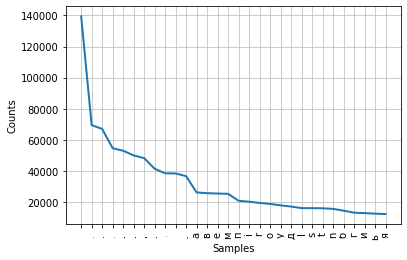

In [88]:
fdist.plot(30,cumulative=False)